# Лабораторная работа 1
## Тема: Расчёт геометрической вероятности

# Выполнили:
	ФИО:    Рябков Лев Юрьевич     Воронин Илья Андреевич
    ИСУ:    467302                 372736
    Группа: J3113                  J3112

## Цель работы

### Изучить метод Монте-Карло для оценки геометрической вероятности. Рассчитать вероятность попадания случайной точки в круг на основе моделирования. Исследовать зависимость точности оценки от числа случайных точек.



# 1. Ход выполнения работы

Лабораторная работа выполнялась с использованием Python, библиотеки numpy для работы с массивами данных и matplotlib для визуализации результатов.

## 1.1 Постановка задачи

Дано пространство элементарных исходов Ω, представляющее собой квадрат со стороной 2a, центрированный в начале координат. Благоприятное событие A(r) — точка попадает в круг радиуса r, центр которого также находится в начале системы координат.

### Необходимо:
	1. Для нескольких значений радиуса r рассчитать истинную вероятность попадания точки в круг.
	2. Оценить вероятность методом Монте-Карло, сгенерировав случайные точки в квадрате.
	3. Построить графики:
	  • ценки вероятности в зависимости от числа точек n.
	  • Ошибки между оценкой и истинной вероятностью.
	4. Для набора точностей ε вычислить минимальное количество точек N(ε) для каждого r и построить графики зависимости N(ε).

# 2. Основная часть

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2.1 Выбор значений параметров
	• Сторона квадрата: 2a = 2, значит a = 1.
	• Радиусы круга r выбраны по формуле r_k = a - k * Δr, где Δr = 0.2.
      Получены радиусы: r = [1.0, 0.8, 0.6, 0.4, 0.2].
	• Точности ε: ε = {10^-1, 10^-2, 10^-3, 10^-4, 10^-5}.
	• Число случайных точек: n_points = 10000.

In [2]:
a = 1
n_points = 10000
n_radii = 5
delta_r = 0.2
epsilon_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

# Радиусы окружностей
radii = [a - k * delta_r for k in range(n_radii)]

## 2.2 Истинная вероятность попадания в круг

Истинная вероятность события A(r) рассчитывается как отношение площадей круга и квадрата:

$$
p(r) = \dfrac{S_{\text{круга}}}{S_{\text{квадрата}}} = \dfrac{\pi r^2}{4a^2}
$$

Реализовано в функции true_probability(r, a).

In [3]:
def true_probability(r, a):
    return (np.pi * r ** 2) / (4 * a ** 2)

## 2.3 Оценка вероятности методом Монте-Карло

Сгенерированы случайные точки n_points в квадрате [-a, a] x [-a, a]. Оценивается доля точек, попавших внутрь круга радиуса r

Функция monte_carlo_probability(r, a, n_points) возвращает:
	•	Оценку вероятности (доля точек внутри круга).
	•	Координаты точек для последующего анализа.

In [4]:
def monte_carlo_probability(r, a, n_points):
    x = np.random.uniform(-a, a, n_points)
    y = np.random.uniform(-a, a, n_points)
    inside_circle = (x ** 2 + y ** 2) <= r ** 2
    return np.mean(inside_circle), x, y

## 2.4 График оценки вероятности $\hat{p}(n)$ и ошибки $\epsilon(n)$

Для каждого радиуса r построены графики:
	•	Оценка вероятности в зависимости от числа точек n.
	•	Ошибка между оценкой и истинной вероятностью:
$$
\epsilon(n) = |\hat{p}(n) - p(r)|
$$

Функция plot_results() отображает результаты.

In [5]:
def plot_results(r, p_true, n_points, epsilon_values, x, y):
    n_values = np.arange(1, n_points + 1)
    p_est_cumulative = np.cumsum((x ** 2 + y ** 2) <= r ** 2) / n_values

    plt.figure(figsize=(12, 8))

    # График оценки вероятности
    plt.subplot(2, 1, 1)
    plt.plot(n_values, p_est_cumulative, label=r'$\hat{p}(n)$')
    plt.axhline(p_true, color='r', linestyle='--', label=r'$p$')
    plt.xlabel(r'Число точек $n$')
    plt.ylabel(r'Оценка вероятности')
    plt.title(f'Оценка вероятности для радиуса r = {r:.2f}')
    plt.legend()

    # График ошибки
    plt.subplot(2, 1, 2)
    epsilon = np.abs(p_est_cumulative - p_true)
    plt.plot(n_values, epsilon, label=r'$\epsilon(n)$')
    for eps in epsilon_values:
        plt.axhline(eps, color='g', linestyle='--', label=rf'$\epsilon = {eps}$')
    plt.xlabel(r'Число точек $n$')
    plt.ylabel(r'Ошибка')
    plt.title(f'Ошибка оценки для радиуса r = {r:.2f}')
    plt.legend()

    plt.tight_layout()
    plt.show()

## 2.5 Расчёт необходимого количества точек $N(ε)$

Для каждого радиуса r и каждой точности ε определено минимальное количество точек N, при котором ошибка оценки становится меньше ε.

    • Для этого анализируется массив ошибок ε(n).
    • Находим первое значение n, при котором ε(n) ≤ ε.

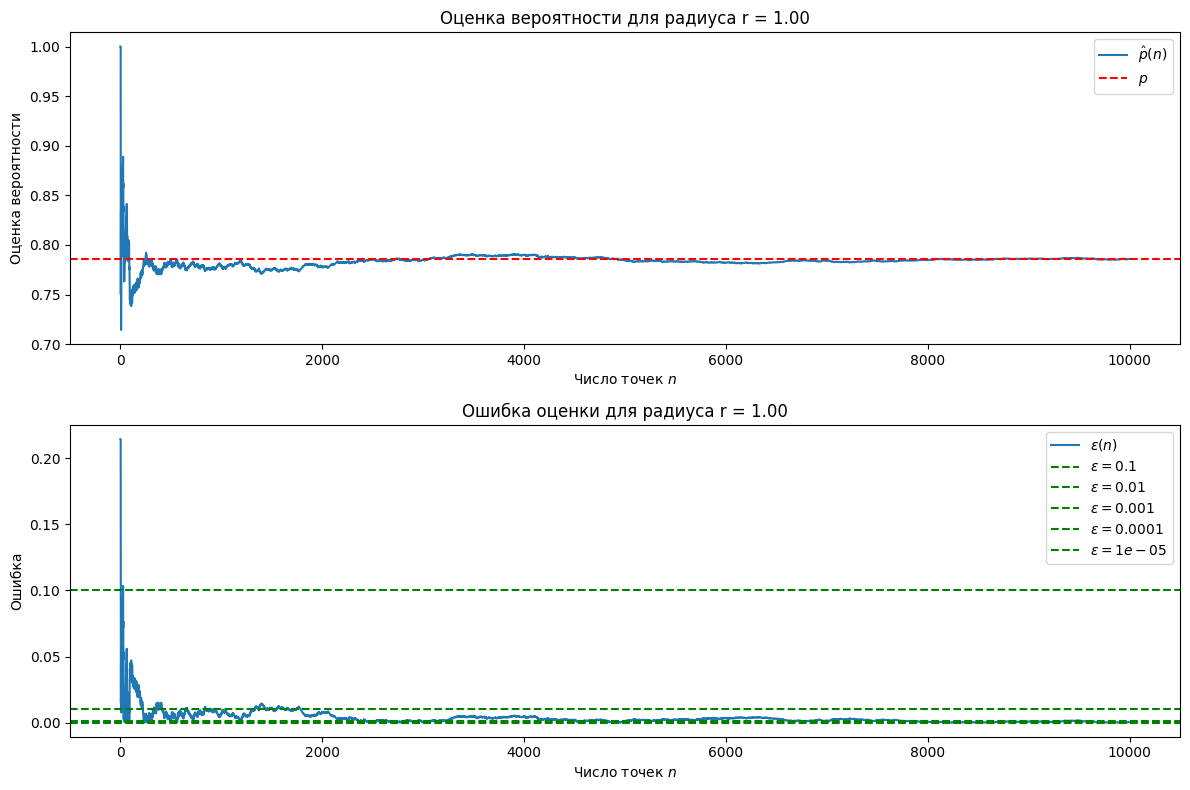

Для радиуса r = 1.00 и точности ε = 0.1 необходимо N = 4 точек
Для радиуса r = 1.00 и точности ε = 0.01 необходимо N = 9 точек
Для радиуса r = 1.00 и точности ε = 0.001 необходимо N = 42 точек
Для радиуса r = 1.00 и точности ε = 0.0001 необходимо N = 233 точек
Для радиуса r = 1.00 и точности ε = 1e-05 необходимо N = 233 точек


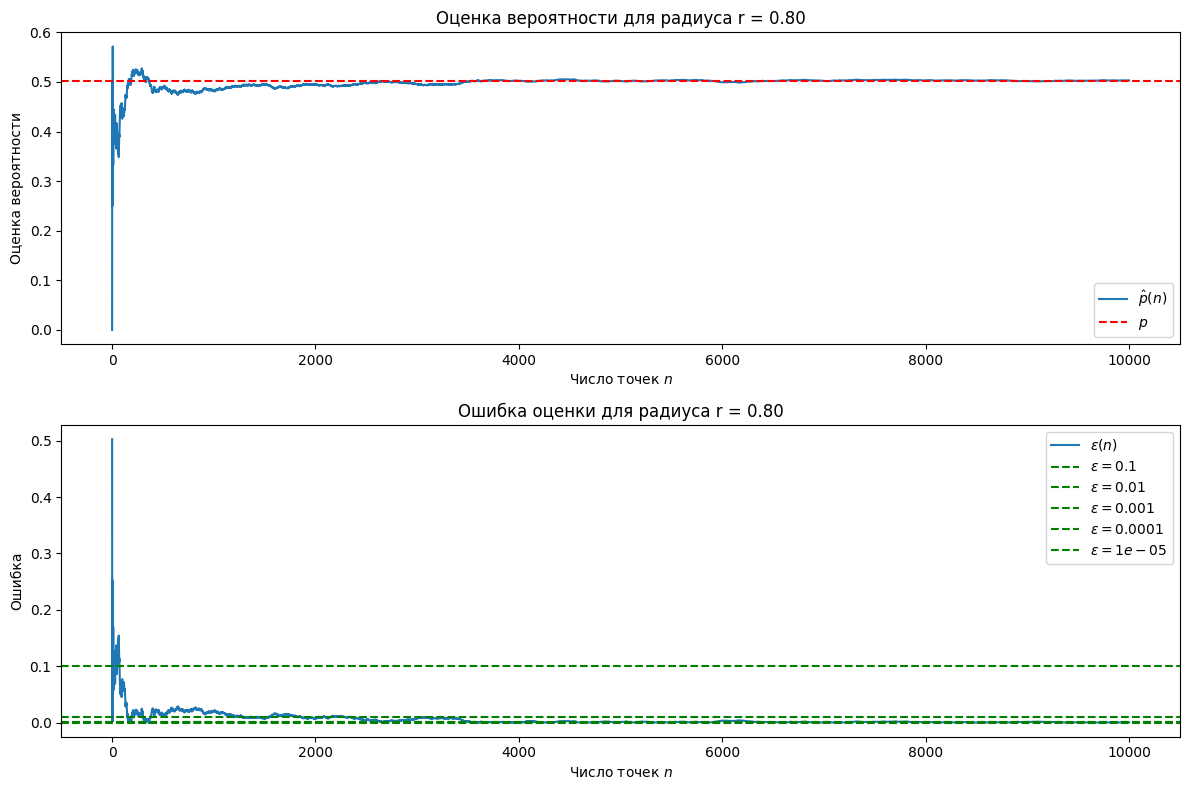

Для радиуса r = 0.80 и точности ε = 0.1 необходимо N = 2 точек
Для радиуса r = 0.80 и точности ε = 0.01 необходимо N = 2 точек
Для радиуса r = 0.80 и точности ε = 0.001 необходимо N = 165 точек
Для радиуса r = 0.80 и точности ε = 0.0001 необходимо N = 189 точек
Для радиуса r = 0.80 и точности ε = 1e-05 необходимо N = 189 точек


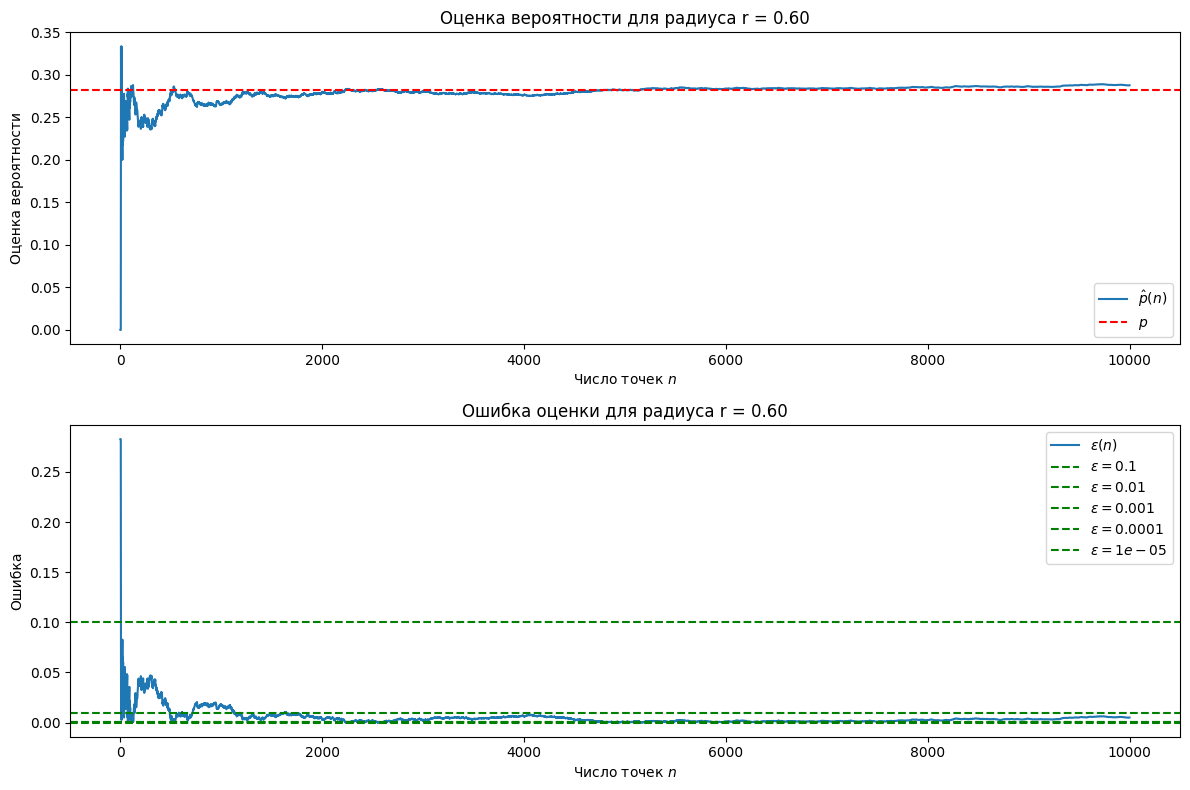

Для радиуса r = 0.60 и точности ε = 0.1 необходимо N = 5 точек
Для радиуса r = 0.60 и точности ε = 0.01 необходимо N = 7 точек
Для радиуса r = 0.60 и точности ε = 0.001 необходимо N = 110 точек
Для радиуса r = 0.60 и точности ε = 0.0001 необходимо N = 541 точек
Для радиуса r = 0.60 и точности ε = 1e-05 необходимо N = 2253 точек


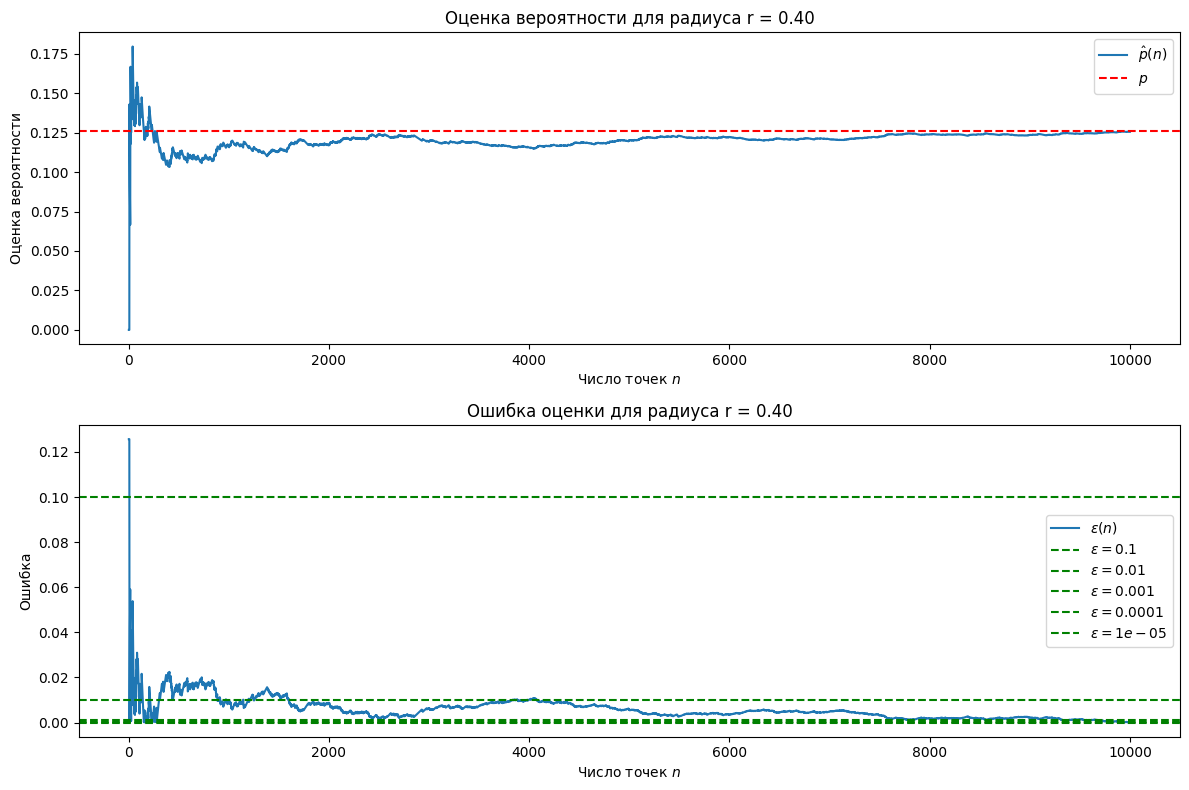

Для радиуса r = 0.40 и точности ε = 0.1 необходимо N = 7 точек
Для радиуса r = 0.40 и точности ε = 0.01 необходимо N = 8 точек
Для радиуса r = 0.40 и точности ε = 0.001 необходимо N = 8 точек
Для радиуса r = 0.40 и точности ε = 0.0001 необходимо N = 167 точек
Для радиуса r = 0.40 и точности ε = 1e-05 необходимо N = 9923 точек


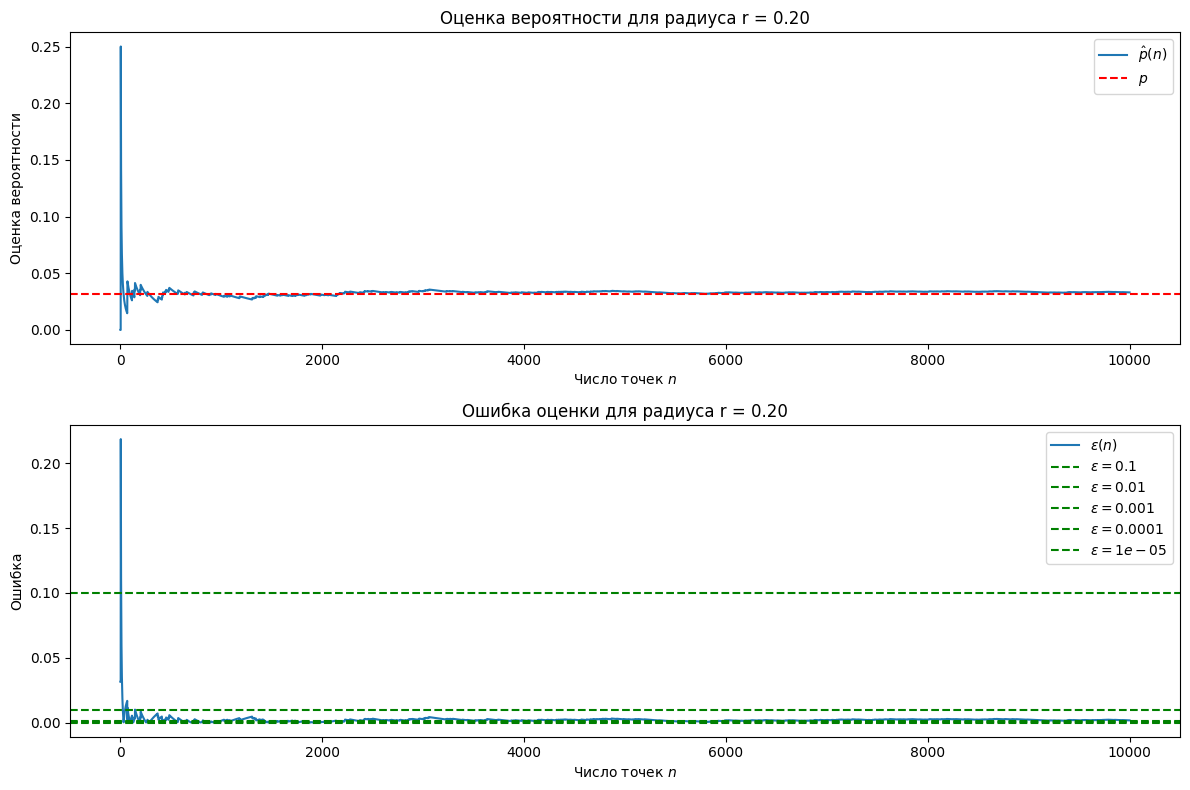

Для радиуса r = 0.20 и точности ε = 0.1 необходимо N = 1 точек
Для радиуса r = 0.20 и точности ε = 0.01 необходимо N = 25 точек
Для радиуса r = 0.20 и точности ε = 0.001 необходимо N = 31 точек
Для радиуса r = 0.20 и точности ε = 0.0001 необходимо N = 127 точек
Для радиуса r = 0.20 и точности ε = 1e-05 необходимо N = 191 точек


In [6]:
n_required_dict = {}

for r in radii:
    p_true = true_probability(r, a)
    p_est, x, y = monte_carlo_probability(r, a, n_points)

    # Построение графиков оценки вероятности и ошибки
    plot_results(r, p_true, n_points, epsilon_values, x, y)

    # Вычисляем ε(n)
    n_values = np.arange(1, n_points + 1)
    p_est_cumulative = np.cumsum((x ** 2 + y ** 2) <= r ** 2) / n_values
    epsilon_cumulative = np.abs(p_est_cumulative - p_true)

    n_required = []

    for eps in epsilon_values:
        indices = np.where(epsilon_cumulative <= eps)[0]
        if len(indices) > 0:
            N_eps = indices[0] + 1
        else:
            N_eps = n_points
        n_required.append(N_eps)
        print(f"Для радиуса r = {r:.2f} и точности ε = {eps} необходимо N = {N_eps} точек")

    n_required_dict[r] = n_required

• Первый график: Сходимость $\hat{p}(n)$ к $p(r)$ при увеличении числа точек.

• Второй график: Уменьшение ошибки $\epsilon(n)$ при увеличении числа точек. Также показаны горизонтальные линии, соответствующие значениям ε.

## 2.6 График зависимости $N(ε)$

Построены графики зависимости $N(ε)$ для каждого радиуса r в логарифмическом масштабе.

Особенности графика:

	• По оси X — точность ε (логарифмическая шкала).
	• По оси Y — необходимое количество точек N(ε) (логарифмическая шкала).
	• Для разных радиусов r построены отдельные кривые.

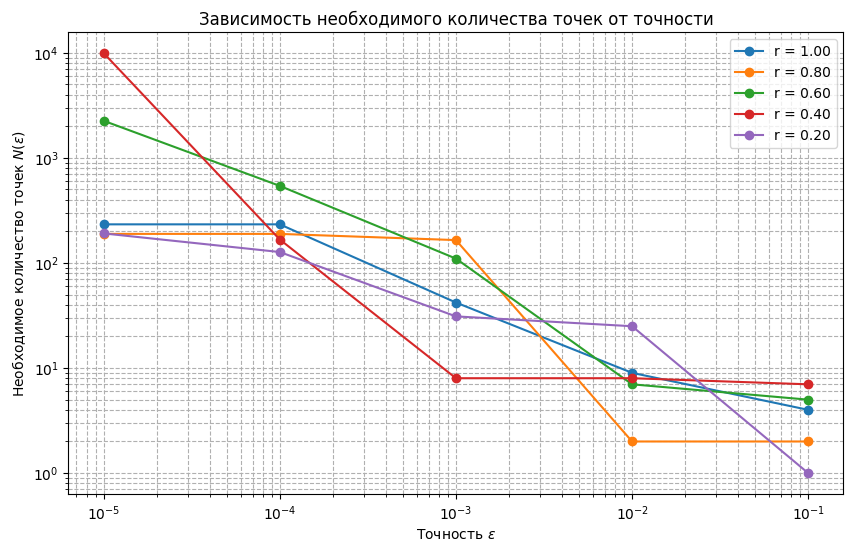

In [7]:
plt.figure(figsize=(10, 6))

for r in radii:
    n_required = n_required_dict[r]
    plt.plot(epsilon_values, n_required, marker='o', label=f'r = {r:.2f}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Точность $\epsilon$')
plt.ylabel(r'Необходимое количество точек $N(\epsilon)$')
plt.title('Зависимость необходимого количества точек от точности')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# 3. Заключение

В ходе выполнения лабораторной работы были достигнуты следующие результаты:

	1. Оценка вероятности методом Монте-Карло:
    	• Было продемонстрировано, как метод Монте-Карло позволяет вычислить вероятности для геометрических событий.
	    • Сходимость оценочной вероятности p(n) к истинной вероятности p(r) с увеличением числа точек n была подтверждена.
        
	2. Зависимость ошибки от числа точек:
    	• Ошибка ε(n) с уменьшением числа точек снижается, что подтверждает сходимость метода Монте-Карло.
	    • Для достижения заданной точности ε требуется экспоненциально увеличивать количество точек N(ε), что является характерным для метода Монте-Карло.
        
	3. Графики:
	    • Графики, построенные для разных радиусов и точностей, наглядно демонстрируют сходимость метода и зависимость точности от числа точек.